# Generate dataset 

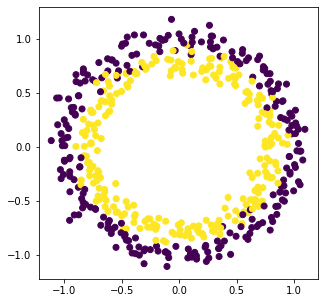

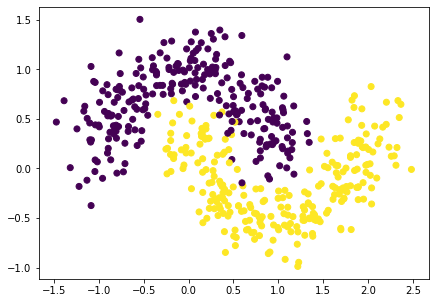

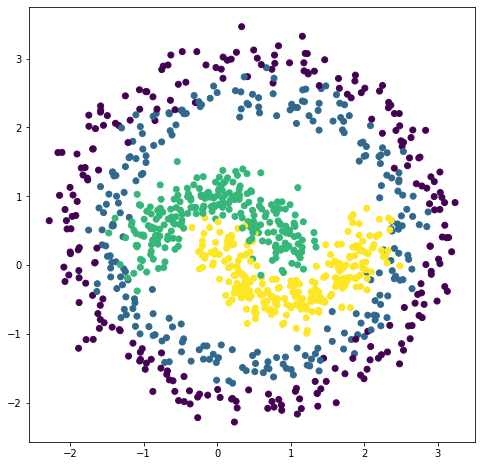

In [1]:
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
import numpy as np

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)
plt.show()


moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.figure(figsize=(7, 5))
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.show()

points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()

# Define  plot_decisions function

In [2]:
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decisions(features, target, model, *, features_index=(0, 1), figsize=(10,10)):
    if not isinstance(model, Pipeline):
        warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
        plot_decision_regions(X=features, y=target, clf=model, legend=2)
        title = (f'Decision surface of {type(model).__name__}')
    else:
        fig, ax = plt.subplots(figsize=figsize)
        xx, yy = make_meshgrid(
            features[:, features_index[0]], 
            features[:, features_index[1]]
        )
        plot_contours(ax, model, xx, yy, alpha=0.2)
        plt.scatter(
            features[:, features_index[0]], 
            features[:, features_index[1]], 
            c=target
        )
        title = (f'Decision surface of {model.steps[-1][0]}')
    plt.title(title, fontsize=18)
    plt.show() 


# Test

Logistic regression accuracy is 0.941


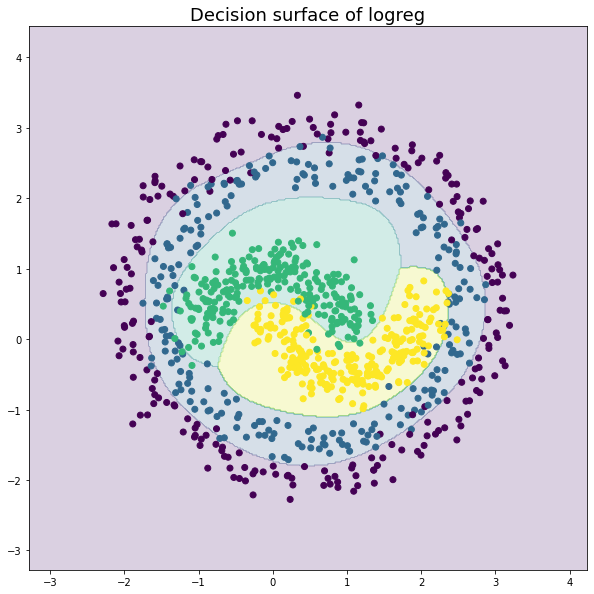

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

features = points
target = labels

poly = PolynomialFeatures(6)
logreg = LogisticRegression(solver='liblinear', max_iter=500) 
pipe = Pipeline([('poly', poly), ('logreg', logreg)])

pipe.fit(features, target)

lr_accuracy = pipe.score(features, target)
print(f'Logistic regression accuracy is {lr_accuracy:.3f}')

plot_decisions(features, target, pipe)

